Homework 3 - Submission 2
Yvonna Smothers

Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Read output datasets
full_tax_burden_data = pd.read_csv('/Users/yvonnasmothers/Documents/GitHub/Homework 3/Homework-3/data/output/TaxBurden_Data.csv',low_memory=False, sep="\t")

1. Present a bar graph showing the proportion of states with a change in their cigarette tax in each year from 1970 to 1985.

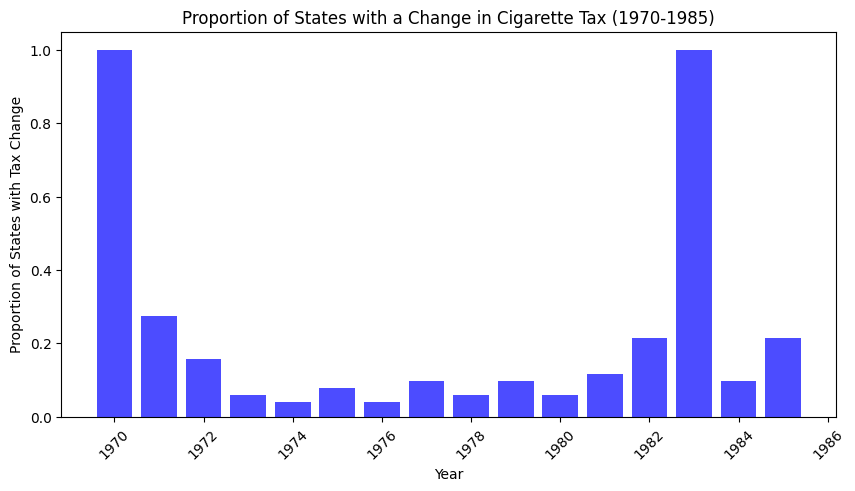

In [3]:
# Filter for 1970-1985
data_1970_1985 = full_tax_burden_data[(full_tax_burden_data["Year"] >= 1970) & (full_tax_burden_data["Year"] <= 1985)].copy()

# Sort values for comparison
data_1970_1985.sort_values(by=["state", "Year"], inplace=True)

# Identify tax changes
data_1970_1985["tax_change"] = data_1970_1985.groupby("state")["tax_dollar"].diff().ne(0)

# Compute proportion of states with tax changes per year
tax_change_proportion = data_1970_1985.groupby("Year")["tax_change"].mean()

# Plot the bar graph
plt.figure(figsize=(10, 5))
plt.bar(tax_change_proportion.index, tax_change_proportion.values, color="blue", alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Proportion of States with Tax Change")
plt.title("Proportion of States with a Change in Cigarette Tax (1970-1985)")
plt.xticks(rotation=45)
plt.show()


2. Plot on a single graph the average tax (in 2012 dollars) on cigarettes and the average price of a pack of cigarettes from 1970 to 2018.

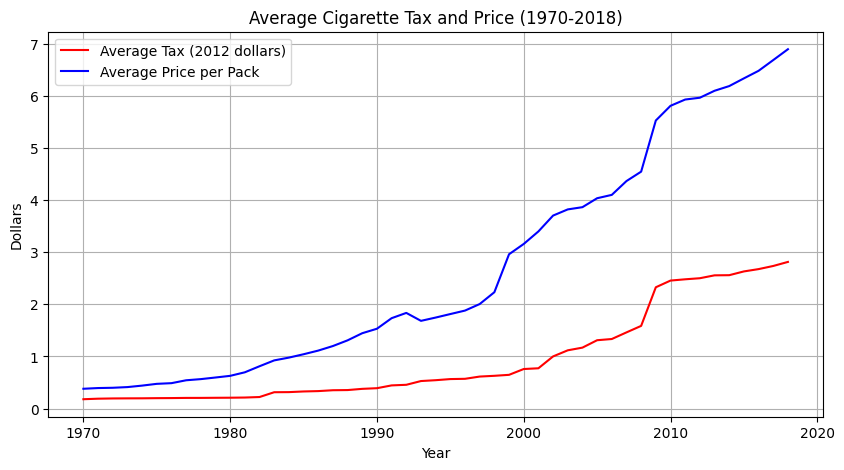

In [4]:
# Filter for 1970-2018
data_1970_2018 = full_tax_burden_data[(full_tax_burden_data["Year"] >= 1970) & (full_tax_burden_data["Year"] <= 2018)].copy()

# Compute averages
avg_tax = data_1970_2018.groupby("Year")["tax_dollar"].mean()
avg_price = data_1970_2018.groupby("Year")["cost_per_pack"].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(avg_tax.index, avg_tax.values, label="Average Tax (2012 dollars)", color="red")
plt.plot(avg_price.index, avg_price.values, label="Average Price per Pack", color="blue")
plt.xlabel("Year")
plt.ylabel("Dollars")
plt.title("Average Cigarette Tax and Price (1970-2018)")
plt.legend()
plt.grid(True)
plt.show()


3. Identify the 5 states with the highest increases in cigarette prices (in dollars) over the time period. Plot the average number of packs sold per capita for those states from 1970 to 2018.

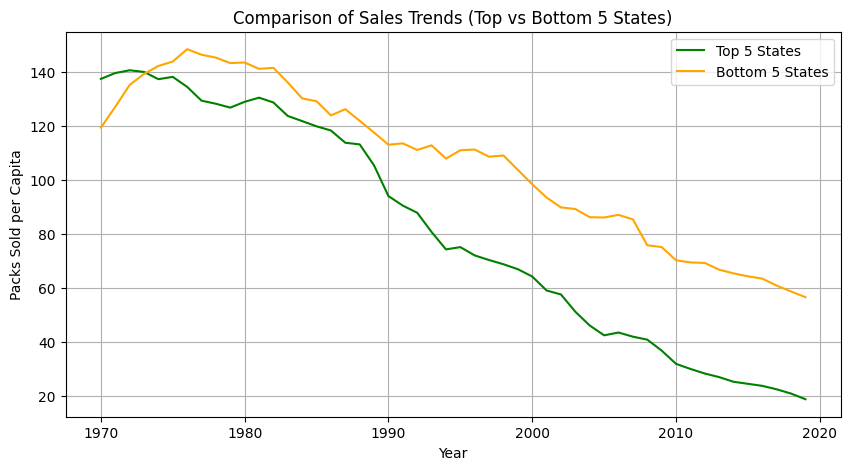

In [5]:
# Compute price difference for each state
price_diff = full_tax_burden_data.groupby("state")["cost_per_pack"].agg(lambda x: x.iloc[-1] - x.iloc[0])

# Identify top 5 and bottom 5 states
top5_states = price_diff.nlargest(5).index
bottom5_states = price_diff.nsmallest(5).index

# Filter data for those states
data_top5 = full_tax_burden_data[full_tax_burden_data["state"].isin(top5_states)]
data_bottom5 = full_tax_burden_data[full_tax_burden_data["state"].isin(bottom5_states)]

# Compute average packs sold per capita for top 5 states
top5_sales = data_top5.groupby("Year")["sales_per_capita"].mean()

# Compute average packs sold per capita for bottom 5 states
bottom5_sales = data_bottom5.groupby("Year")["sales_per_capita"].mean()

# Plot sales trends
plt.figure(figsize=(10, 5))
plt.plot(top5_sales.index, top5_sales.values, label="Top 5 States", color="green")
plt.plot(bottom5_sales.index, bottom5_sales.values, label="Bottom 5 States", color="orange")
plt.xlabel("Year")
plt.ylabel("Packs Sold per Capita")
plt.title("Comparison of Sales Trends (Top vs Bottom 5 States)")
plt.legend()
plt.grid(True)
plt.show()


4. Identify the 5 states with the lowest increases in cigarette prices over the time period. Plot the average number of packs sold per capita for those states from 1970 to 2018.

In [6]:
# Filter data for 1970-1990
data_1970_1990 = full_tax_burden_data[(full_tax_burden_data["Year"] >= 1970) & (full_tax_burden_data["Year"] <= 1990)].copy()

# Take logs
data_1970_1990["log_sales"] = np.log(data_1970_1990["sales_per_capita"])
data_1970_1990["log_price"] = np.log(data_1970_1990["cost_per_pack"])

# OLS regression: log_sales ~ log_price
X = sm.add_constant(data_1970_1990["log_price"])
y = data_1970_1990["log_sales"]
model = sm.OLS(y, X).fit()

# Display results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     153.9
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           4.18e-33
Time:                        07:13:56   Log-Likelihood:                 148.99
No. Observations:                1071   AIC:                            -294.0
Df Residuals:                    1069   BIC:                            -284.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7504      0.008    585.321      0.0

5. Compare the trends in sales from the 5 states with the highest price increases to those with the lowest price increases.

6. Focusing only on the time period from 1970 to 1990, regress log sales on log prices to estimate the price elasticity of demand over that period. Interpret your results.

In [7]:
# Filter data for 1970-1990
data_1970_1990 = full_tax_burden_data[(full_tax_burden_data["Year"] >= 1970) & (full_tax_burden_data["Year"] <= 1990)].copy()

# Take logs
data_1970_1990["log_sales"] = np.log(data_1970_1990["sales_per_capita"])
data_1970_1990["log_price"] = np.log(data_1970_1990["cost_per_pack"])

# OLS regression: log_sales ~ log_price
X = sm.add_constant(data_1970_1990["log_price"])
y = data_1970_1990["log_sales"]
model = sm.OLS(y, X).fit()

# Display results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     153.9
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           4.18e-33
Time:                        07:13:56   Log-Likelihood:                 148.99
No. Observations:                1071   AIC:                            -294.0
Df Residuals:                    1069   BIC:                            -284.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7504      0.008    585.321      0.0

7. Again limiting to 1970 to 1990, regress log sales on log prices using the total (federal and state) cigarette tax (in dollars) as an instrument for log prices. Interpret your results and compare your estimates to those without an instrument. Are they different? If so, why?

8. Show the first stage and reduced-form results from the instrument.

In [8]:
# First stage: log_price ~ tax_dollar
X_iv = sm.add_constant(data_1970_1990["tax_dollar"])
y_iv = data_1970_1990["log_price"]
first_stage = sm.OLS(y_iv, X_iv).fit()

# Get predicted log prices
data_1970_1990["log_price_hat"] = first_stage.predict(X_iv)

# Second stage: log_sales ~ log_price_hat
X_second = sm.add_constant(data_1970_1990["log_price_hat"])
y_second = data_1970_1990["log_sales"]
second_stage = sm.OLS(y_second, X_second).fit()

# Display IV regression results
print("First Stage Regression:\n", first_stage.summary())
print("\nSecond Stage (IV) Regression:\n", second_stage.summary())

First Stage Regression:
                             OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     2431.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          1.52e-277
Time:                        07:13:56   Log-Likelihood:                -66.026
No. Observations:                1071   AIC:                             136.1
Df Residuals:                    1069   BIC:                             146.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4288      

9. Repeat questions 1-3 focusing on the period from 1991 to 2015

In [9]:
# Repeat OLS and IV steps for 1991-2015
data_1991_2015 = full_tax_burden_data[(full_tax_burden_data["Year"] >= 1991) & (full_tax_burden_data["Year"] <= 2015)].copy()

data_1991_2015["log_sales"] = np.log(data_1991_2015["sales_per_capita"])
data_1991_2015["log_price"] = np.log(data_1991_2015["cost_per_pack"])

# OLS
X = sm.add_constant(data_1991_2015["log_price"])
y = data_1991_2015["log_sales"]
model_ols = sm.OLS(y, X).fit()

# IV Regression
X_iv = sm.add_constant(data_1991_2015["tax_dollar"])
y_iv = data_1991_2015["log_price"]
first_stage_iv = sm.OLS(y_iv, X_iv).fit()

data_1991_2015["log_price_hat"] = first_stage_iv.predict(X_iv)

X_second_iv = sm.add_constant(data_1991_2015["log_price_hat"])
y_second_iv = data_1991_2015["log_sales"]
second_stage_iv = sm.OLS(y_second_iv, X_second_iv).fit()

# Print results
print("\nOLS (1991-2015):\n", model_ols.summary())
print("\nIV Regression (1991-2015):\n", second_stage_iv.summary())



OLS (1991-2015):
                             OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1451.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          1.52e-212
Time:                        07:13:56   Log-Likelihood:                -296.47
No. Observations:                1275   AIC:                             596.9
Df Residuals:                    1273   BIC:                             607.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0395      0.023 

10. Compare your elasticity estimates from 1970-1990 versus those from 1991-2015. Are they different? If so, why?

In [10]:
print("Elasticity (1970-1990):", model.params["log_price"])
print("Elasticity (1991-2015):", model_ols.params["log_price"])

Elasticity (1970-1990): -0.1715395601953793
Elasticity (1991-2015): -0.6656263582995867
